In [ ]:
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score
import nltk 
from sklearn.metrics import roc_curve
from matplotlib import pyplot as plt
from sklearn.model_selection import cross_val_score, KFold

In [2]:
dataframe=pd.read_csv('train.csv')

In [ ]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\LENOVO\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [ ]:
dataframe.isnull().sum()
dataframe=dataframe.fillna('')

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [8]:
dataframe['content']=dataframe['author']+' '+dataframe['title']

In [ ]:
X=dataframe.drop(columns='label',axis=1)
Y=dataframe['label']
X=dataframe['content'].values
Y=dataframe['label'].values


In [ ]:
#Data stemming
port_stem=PorterStemmer()

In [11]:
def stemming(content):
    stemmed_content=content.lower()
    stemmed_content=stemmed_content.split()
    stemmed_content=[port_stem.stem(word) for word in stemmed_content if not word in stopwords.words('English')]
    stemmed_content=' '.join(stemmed_content)
    return stemmed_content

dataframe['content']=dataframe['content'].apply(stemming)


In [ ]:
vectorizer=TfidfVectorizer()
vectorizer.fit(X)
X=vectorizer.transform(X)  

['darrel lucu hous dem aide: didn’t even see comey’ letter jason chaffetz tweet'
 'daniel j. flynn flynn: hillari clinton, big woman campu - breitbart'
 'consortiumnews.com truth might get fire' ...
 'michael j. de la merc rachel abram macy’ said receiv takeov approach hudson’ bay - new york time'
 'alex ansari nato, russia hold parallel exercis balkan'
 'david swanson keep f-35 aliv']


In [ ]:
# Creating a Logistic Regression model
model=LogisticRegression()
# Split the dataset into training and testing sets (80% training, 20% testing)
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,stratify=Y,random_state=2,shuffle=True)
model.fit(X_train,Y_train)
Y_train_pred=model.predict(X_train)
train_accuracy=accuracy_score(Y_train_pred,Y_train)
print('Accuracy score of training data :',train_accuracy)



Accuracy score of training data : 0.9865384615384616


In [15]:
Y_test_pred=model.predict(X_test)
test_accuracy=accuracy_score(Y_test_pred,Y_test)
print('Accuracy score of testing data :',test_accuracy)

Accuracy score of testing data : 0.9774038461538461


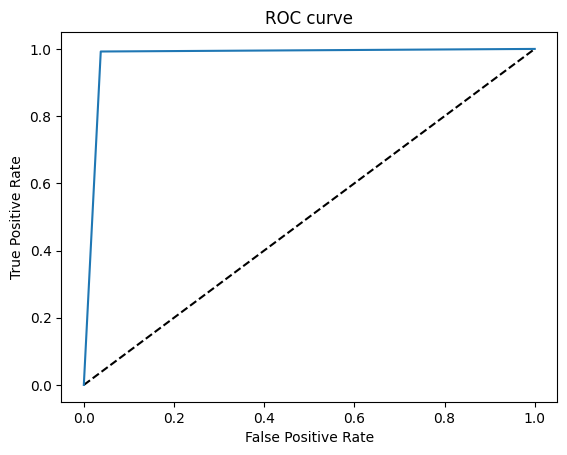

In [ ]:
# ROC curve visualization
fpr, tpr, threshholds=roc_curve(Y_test,Y_test_pred)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve')
plt.show()

In [ ]:
# Calculate and print the Area Under the ROC Curve (AUC)
print('ROC AUC Score : ',roc_auc_score(Y_test,Y_test_pred))

ROC AUC Score :  0.9773823031713962


In [20]:
# Cross-validation setup with 5 folds
kfold=KFold(n_splits=5,shuffle=True,random_state=2)
# Perform cross-validation and calculate accuracy for each fold
cv_rslts=cross_val_score(model,X,Y,cv=kfold,scoring='accuracy')
# Print the cross-validation results
print('Cross-validation result: ' , cv_rslts)
print('Mean accuracy score :',cv_rslts.mean(),'\nStandard deviation :',cv_rslts.std())


Cross-validation result:  [0.97692308 0.97403846 0.97644231 0.97644231 0.97644231]
Mean accuracy score : 0.9760576923076922 
Standard deviation : 0.0010266421396183916
